In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import joblib

print(" Libraries imported successfully!")

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_credit_score.csv')
print("Cleaned dataset loaded!")
print("Shape:", df.shape)


 Libraries imported successfully!
Cleaned dataset loaded!
Shape: (100000, 28)


In [4]:
# Features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80000, 27)
Test shape: (20000, 27)


In [5]:
rf_model = joblib.load('../models/credit_score_model.pkl')
print(" Model loaded successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '../models/credit_score_model.pkl'

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(" Model trained successfully!")


 Model trained successfully!


🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      3566
           1       0.78      0.80      0.79      5799
           2       0.81      0.81      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



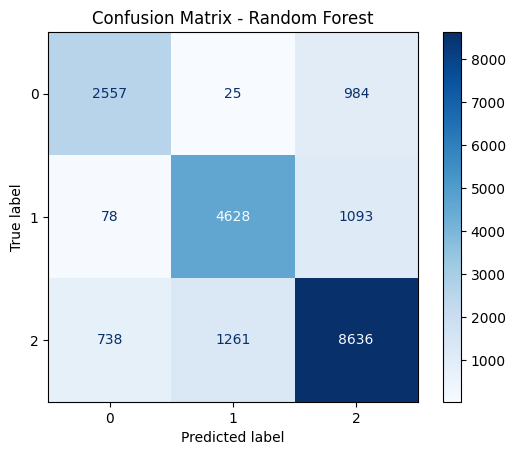

In [7]:
y_pred = rf_model.predict(X_test)

print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [8]:
import joblib

joblib.dump(rf_model, '../models/credit_score_model.pkl')
print(" Model saved successfully as credit_score_model.pkl")


 Model saved successfully as credit_score_model.pkl


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print("📊 MODEL EVALUATION SUMMARY")
print(summary)


📊 MODEL EVALUATION SUMMARY
      Metric     Score
0   Accuracy  0.791050
1  Precision  0.790722
2     Recall  0.791050
3   F1 Score  0.790756


In [10]:
model = joblib.load('../models/credit_score_model.pkl')
sample_pred = model.predict(X_test[:5])
print(" Model reload successful — sample predictions:", sample_pred)


 Model reload successful — sample predictions: [1 1 1 2 2]
